In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import random
import os
import glob
%matplotlib widget

In [2]:
scan_48 = pd.read_csv('control/48_scans.csv').drop(columns=['wave_no'])
kgy5_sn48 = pd.read_csv('5kgy/5kgy_sn48.csv')
kgy10_sn48 = pd.read_csv('10kgy/10kgy_sn48.csv')
wave_no = pd.read_csv('control/wave_no.csv')

In [3]:
for df in [scan_48, kgy5_sn48, kgy10_sn48]:
    df['average'] = df.iloc[:,:].mean(axis=1)

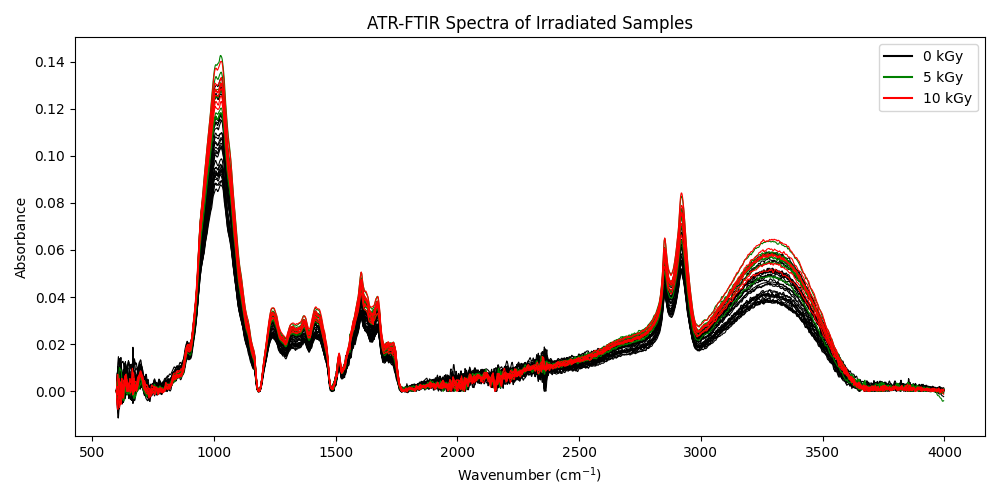

No such comm: 885ba5a40fe84c7186f8f5a14a3c041f


In [4]:
plt.close('all')
irrad_comp, axis = plt.subplots(1,1, figsize=(10,5))

colors = ['black', 'green', 'red']
labels = ['0 kGy', '5 kGy', '10 kGy']

for color, label in zip(colors, labels):
    axis.plot([],[], color=color, label=label)

for sample in scan_48.columns:
    axis.plot(wave_no, scan_48[sample], color='black', linewidth=0.8)

for sample in kgy5_sn48.columns:
    axis.plot(wave_no, kgy5_sn48[sample], color='green', linewidth=0.8)

for sample in kgy10_sn48.columns:
    axis.plot(wave_no, kgy10_sn48[sample], color='red',  linewidth=0.8)

axis.set(title='ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Absorbance')

axis.legend()
irrad_comp.tight_layout()

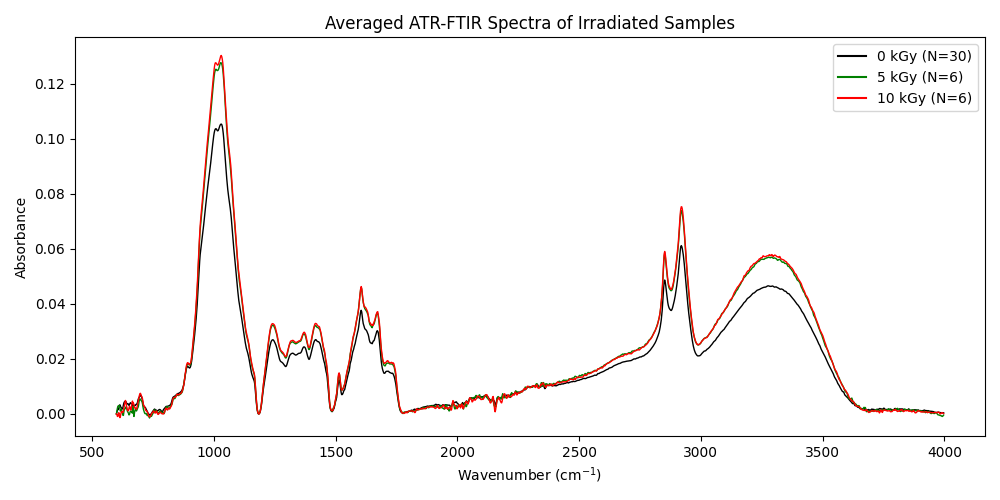

In [5]:
plt.close('all')
irrad_ave, axis = plt.subplots(1,1, figsize=(10,5))

colors = ['black', 'green', 'red']
labels = ['0 kGy (N=30)', '5 kGy (N=6)', '10 kGy (N=6)']
data = [df['average'] for df in [scan_48, kgy5_sn48, kgy10_sn48]]

for color, label, ave in zip(colors, labels, data):
    axis.plot([],[], color=color, label=label)
    axis.plot(wave_no, ave, color=color, linewidth=1)

axis.set(title='Averaged ATR-FTIR Spectra of Irradiated Samples',
         xlabel='Wavenumber (cm$^{-1}$)',
         ylabel='Absorbance')

axis.legend()
irrad_ave.tight_layout()